In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dfp = pd.read_excel('DFP.xlsx', sheet_name='Data', engine='openpyxl')

print("Column headings:")
print(dfp.columns)

Column headings:
Index(['DATE', 'DAY', 'AD_UNIT_NAME', 'ORDER_NAME', 'ADVERTISER_NAME',
       'LINE_ITEM_NAME', 'Tags_served', 'Impressions', 'Clicks', 'CTR',
       'Revenue', 'eCPM'],
      dtype='object')


## Computation of Pearson's Product Moment Correlation

In [2]:
corr_pears = dfp.corr(method ='pearson')
corr_pears

,DAY,Tags_served,Impressions,Clicks,CTR,Revenue,eCPM
DAY,1.000000,0.047141,0.044239,0.028471,0.011570,0.036899,-0.036143
Tags_served,0.047141,1.000000,0.988959,0.742632,0.079464,0.890569,-0.064296
Impressions,0.044239,0.988959,1.000000,0.755156,0.080610,0.901282,-0.062143
Clicks,0.028471,0.742632,0.755156,1.000000,0.122863,0.880604,-0.019728
CTR,0.011570,0.079464,0.080610,0.122863,1.000000,0.095432,-0.013038
Revenue,0.036899,0.890569,0.901282,0.880604,0.095432,1.000000,-0.032811
eCPM,-0.036143,-0.064296,-0.062143,-0.019728,-0.013038,-0.032811,1.000000


<AxesSubplot:>

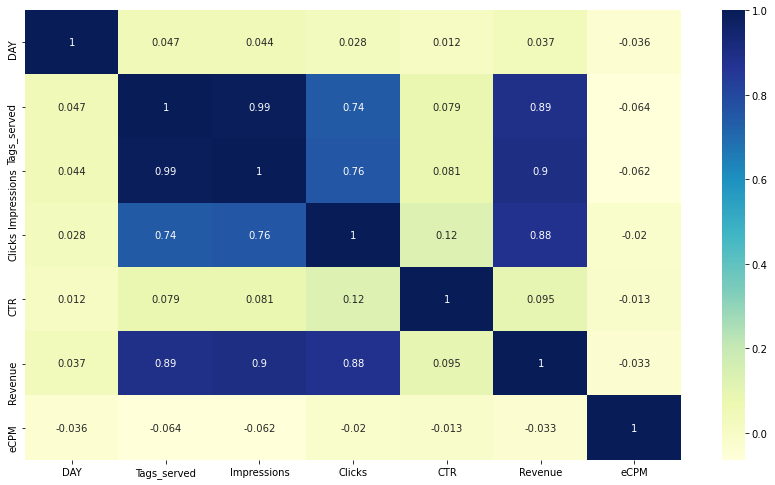

In [3]:
from pylab import rcParams
import seaborn as sb

rcParams['figure.figsize'] = 14.7,8.27
sb.heatmap(corr_pears, 
           xticklabels=corr_pears.columns.values, 
           yticklabels=corr_pears.columns.values, 
           cmap="YlGnBu",
          annot=True)

The correlation matrix is a symmetric matrix that shows pairwise correlation coefficients as measured by the Pearson's Product Moment Correlation. It is found that most of the variables have positive correlation with Revenue (which we assume to be the response variable). Impressions has the highest correlation with Revenue. While Tags Served and Clicks alos have a very high positive correlation with Revenue. DAY and CTR have almost a negligible correlation with Revenue. The predictor eCPM (Effective Cost Per Mile) has a negligible negative correlation with Revenue.So from the correlation study it appears Impressions, Clicks, and Tags_served are very significant predictors for the response Revenue.

## Computation of Spearman's Rank Correlation 

In [4]:
corr_spear = dfp.corr(method ='spearman')
corr_spear

,DAY,Tags_served,Impressions,Clicks,CTR,Revenue,eCPM
DAY,1.000000,0.094704,0.091651,0.063132,0.063178,0.069821,-0.057825
Tags_served,0.094704,1.000000,0.994544,0.580857,0.546843,0.871349,-0.405086
Impressions,0.091651,0.994544,1.000000,0.582840,0.549274,0.878280,-0.388697
Clicks,0.063132,0.580857,0.582840,1.000000,0.985598,0.572608,0.034700
CTR,0.063178,0.546843,0.549274,0.985598,1.000000,0.539552,0.034938
Revenue,0.069821,0.871349,0.878280,0.572608,0.539552,1.000000,-0.032498
eCPM,-0.057825,-0.405086,-0.388697,0.034700,0.034938,-0.032498,1.000000


<AxesSubplot:>

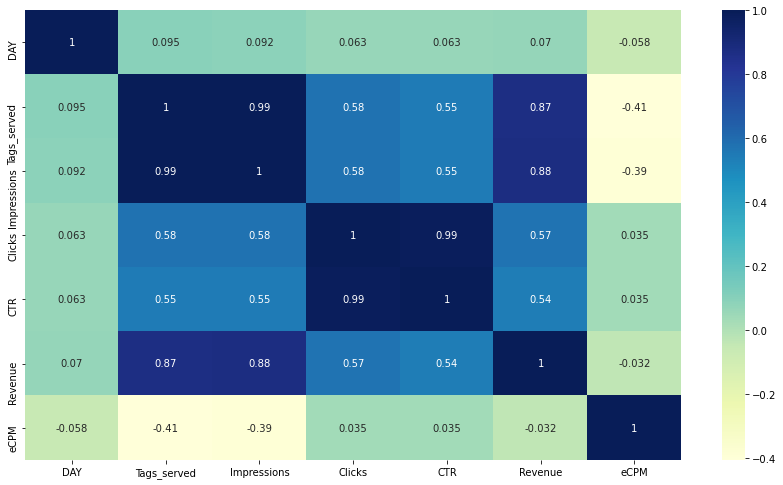

In [5]:
from pylab import rcParams
import seaborn as sb

rcParams['figure.figsize'] = 14.7,8.27
sb.heatmap(corr_spear, 
           xticklabels=corr_spear.columns.values, 
           yticklabels=corr_spear.columns.values, 
           cmap="YlGnBu",
          annot=True)

## Computation of Kendall's Rank Correlation 

In [6]:
corr_kendall = dfp.corr(method='kendall')
corr_kendall

,DAY,Tags_served,Impressions,Clicks,CTR,Revenue,eCPM
DAY,1.000000,0.069176,0.066858,0.051652,0.051622,0.050313,-0.041848
Tags_served,0.069176,1.000000,0.974068,0.501396,0.437353,0.738724,-0.269470
Impressions,0.066858,0.974068,1.000000,0.504635,0.439989,0.752208,-0.261824
Clicks,0.051652,0.501396,0.504635,1.000000,0.911864,0.479756,0.026754
CTR,0.051622,0.437353,0.439989,0.911864,1.000000,0.426385,0.030171
Revenue,0.050313,0.738724,0.752208,0.479756,0.426385,1.000000,0.001971
eCPM,-0.041848,-0.269470,-0.261824,0.026754,0.030171,0.001971,1.000000


In [7]:
from pylab import rcParams
import seaborn as sb
from scipy.stats.stats import kendalltau

<AxesSubplot:>

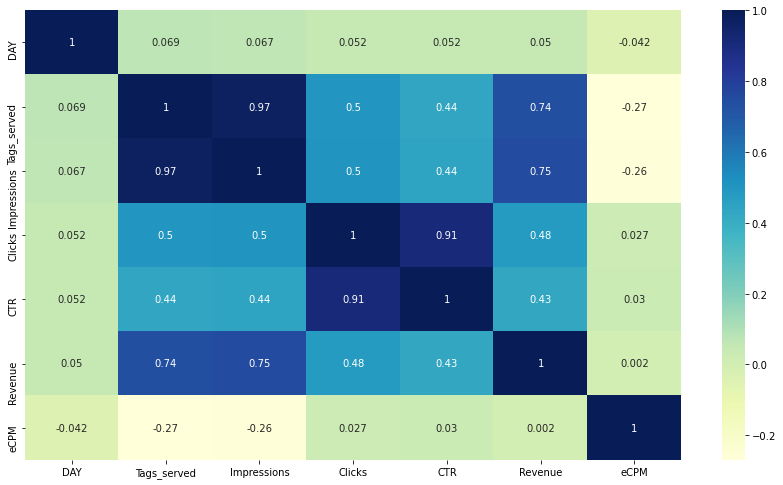

In [9]:
rcParams['figure.figsize'] = 14.7,8.27
sb.heatmap(corr_kendall, 
           xticklabels=corr_kendall.columns.values, 
           yticklabels=corr_kendall.columns.values, 
           cmap="YlGnBu",
          annot=True)

In [10]:
dfp.cov()

,DAY,Tags_served,Impressions,Clicks,CTR,Revenue,eCPM
DAY,4.237265,2.846847e+03,2.538101e+03,1.458178e+01,0.000309,1.190051e+02,-14.797398
Tags_served,2846.847280,8.606994e+08,8.086668e+08,5.420775e+06,30.208382,4.093614e+07,-375169.921296
Impressions,2538.100944,8.086668e+08,7.768391e+08,5.236777e+06,29.112738,3.935861e+07,-344485.536568
Clicks,14.581777,5.420775e+06,5.236777e+06,6.190479e+04,0.396110,3.432861e+05,-976.256991
CTR,0.000309,3.020838e+01,2.911274e+01,3.961097e-01,0.000168,1.937486e+00,-0.033601
Revenue,119.005101,4.093614e+07,3.935861e+07,3.432861e+05,1.937486,2.454861e+06,-10224.793477
eCPM,-14.797398,-3.751699e+05,-3.444855e+05,-9.762570e+02,-0.033601,-1.022479e+04,39557.694636


The covariance of two variables is related to their correlation as: correlation_coef = cov(x,y)/sd(x)*sd(y). The negative covariance value implies a negative correlation values as well. 
The coviarnace of the variables Tags_served, Impressions, and Clicks with the response Revenue are high. 

## Multivariate Regression  

In [11]:
X = dfp[['DAY', 'Tags_served', 'Impressions', 'Clicks', 'CTR', 'eCPM']]
y = dfp['Revenue']

In [12]:
from sklearn import linear_model

In [13]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [14]:
expected = y
predicted = regr.predict(X)

In [15]:
# Summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print(mse)

231733.6343780956


In [16]:
rmse = np.sqrt(mse)
print(rmse)

481.38719797902354


The model RMSE is found to be 481. 39

In [17]:
print (regr.intercept_, regr.coef_) 

-18.20354166487715 [-3.47969234e-01  2.96597422e-03  2.78561787e-02  2.93528895e+00
 -7.31666766e+02  8.39246053e-02]


The intercept of the regression model is: -18.203541664876752
The following are the coefficients:

'DAY': -3.47969234e-01  
'Tags_served': 2.96597422e-03 
'Impressions': 2.78561787e-02 
'Clicks': 2.93528895e+00
'CTR': -7.31666766e+02 
'eCPM': 8.39246053e-02 

In [18]:
print(regr.score(X, y))

0.9056002605937047


The R-squared value for the regression model is: 0.9056002605937047

## Multivariate Regression Using Statmodel 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [20]:
X = dfp[['DAY', 'Tags_served', 'Impressions', 'Clicks', 'CTR', 'eCPM']]
y = dfp['Revenue']

In [21]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 8.038e+04
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        11:47:40   Log-Likelihood:            -3.8192e+05
No. Observations:               50282   AIC:                         7.639e+05
Df Residuals:                   50275   BIC:                         7.639e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -18.2035      4.671     -3.897      

The results shows that except "DAY' all other predictors are highly significations as the p-values of their t- statistics are zeros. Durbin Watson statistic is 1.224, which indicates that there are no significant autocorrelations in the residuals (the critical value being 2.54). Hence the regression model looks quite good. 

In [22]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const          -18.203542
DAY             -0.347969
Tags_served      0.002966
Impressions      0.027856
Clicks           2.935289
CTR           -731.666766
eCPM             0.083925
dtype: float64
R2:  0.9056002605937047


The R-squared value for the regression model is: 0.9056002605937047

In [23]:
print(results.f_test(np.identity(7)))

<F test: F=array([[75286.2463169]]), p=0.0, df_denom=5.03e+04, df_num=7>


The F-statistic for the regression model has a p-value of 0.00, indicating a very good model.

## Paired-Sample T Test 

In [24]:
from scipy import stats

stats.ttest_rel(dfp['Tags_served'], dfp['Impressions'])

Ttest_relResult(statistic=40.69645292261822, pvalue=0.0)

The paired sample t test has yielded a t- statistic value of 40.69 with a p-value of 0.0. Hence the nul hypothesis (H0) did not receive any support. Thus, the two attributes "Tags_served" and "Impressions" have signigicantly differing means, even if they are considered to have pair-wise related..

## Independent Sample T Test 

In [25]:
from scipy import stats

stats.ttest_ind(dfp['Tags_served'], dfp['Impressions'])

Ttest_indResult(statistic=4.52052592971598, pvalue=6.175641709168825e-06)

The independent sample t test has yielded a t- statistic value of 4.52 with a p-value of 6.17e-06. The highly significant t statistic indicates that the nul hypothesis (H0) did not receive much support. Thus, the two attributes "Tags_served" and "Impressions" have signigicantly differing means even if they may be considered independent of each other.

## One-Sample T Test 

In [26]:
from scipy import stats

stats.ttest_1samp(dfp['Tags_served'] - dfp['Impressions'], 0)   

Ttest_1sampResult(statistic=40.69645292261822, pvalue=0.0)

The one sample t test has yielded a t- statistic value of 40.69 with a p-value of 0.0. Hence the nul hypothesis (H0) did not receive any support. Thus, the two attributes "Tags_served" and "Impressions" have signigicantly differing means over the two samples assumed to be coming from the same population.

## Wilcoxon Signed Rank Test 

Since the t-tests assume the residuals to follow normal distribution, we carry out a non-parameetric test - Wilcoxon's Signed rank test.

In [27]:
from scipy import stats

stats.wilcoxon(dfp['Tags_served'] - dfp['Impressions'])  

WilcoxonResult(statistic=6644346.0, pvalue=0.0)

The statistic of the Wilcoxon test is 6644346 with a p-value of 0.0. Hence, there is a signficant difference in the mean values of the two coulmns - Tags_served and Impressions.